<h1 style="font-size:200%"> <center> Supermarket Customer Segementation</center></h1>
<hr>


<div style="text-align: center;">
    <img src="../img/images.jpeg" alt="Description of the image" />
</div>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score, silhouette_score

from flask import Flask,jsonify,request,render_template

%matplotlib inline

np.random.seed(7)
plt.rcParams['figure.figsize'] = (16, 6)
# to change default colormap
sns.set(style="darkgrid")
sns.set_palette("pastel")

# 1. Latar Belakang
Sebagai jantung kehidupan sehari-hari, supermarket memiliki peran krusial dalam memenuhi aspirasi konsumen. <br>Untuk terus memanjakan pelanggan setia dan menarik minat yang lebih luas.<br>**Sebagai Data Scientist** kita bertugas membuat Sebuah supermarket berkomitmen untuk memahami secara mendalam preferensi dan perilaku belanja mereka. Dengan demikian, pengelola supermarket dapat merancang pengalaman belanja yang sesuai, memenuhi ekspektasi, dan menciptakan loyalitas yang mendalam.

## 1.1 Pernyataan Masalah
- Memahami pola belanja: Mengidentifikasi produk apa saja yang sering dibeli, waktu pembelian, dan jumlah pembelian.
- Mengetahui faktor yang mempengaruhi keputusan pembelian: Memahami faktor-faktor seperti harga, merek, kualitas produk, promosi, dan kenyamanan belanja yang mempengaruhi pilihan konsumen.
- Mengidentifikasi segmen pasar: Membagi pelanggan menjadi kelompok-kelompok berdasarkan karakteristik dan preferensi yang berbeda untuk dapat memberikan penawaran yang lebih personal
- Meningkatkan pengalaman belanja: Menyarankan produk yang sesuai dengan memahami apa yang dibutuhkan pelanggan,


# 2 Ringkasan Data
<h2 style="font-size:100%">People:</h2>
<table>
    <tr>
        <th>#</th>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>1</td>
        <td>ID</td>
        <td>Customer's unique identifier</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Year_Birth</td>
        <td>Customer's birth year</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Education</td>
        <td>Customer's education level</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Marital_Status</td>
        <td>Customer's marital status</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Income</td>
        <td>Customer's yearly household income</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Kidhome</td>
        <td>Number of children in customer's household</td>
    </tr>
    <tr>
        <td>7</td>
        <td>Teenhome</td>
        <td>Number of teenagers in customer's household</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Dt_Customer</td>
        <td>Date of customer's enrollment with the company</td>
    </tr>
    <tr>
        <td>9</td>
        <td>Recency</td>
        <td>Number of days since customer's last purchase</td>
    </tr>
    <tr>
        <td>10</td>
        <td>Complain</td>
        <td>1 if the customer complained in the last 2 years, 0 otherwise</td>
    </tr>
</table>

<h2 style="font-size:100%">Products:</h2>
<table>
    <tr>
        <th>#</th>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>11</td>
        <td>MntWines</td>
        <td>Amount spent on wine in last 2 years</td>
    </tr>
    <tr>
        <td>12</td>
        <td>MntFruits</td>
        <td>Amount spent on fruits in last 2 years</td>
    </tr>
    <tr>
        <td>13</td>
        <td>MntMeatProducts</td>
        <td>Amount spent on meat in last 2 years</td>
    </tr>
    <tr>
        <td>14</td>
        <td>MntFishProducts</td>
        <td>Amount spent on fish in last 2 years</td>
    </tr>
    <tr>
        <td>15</td>
        <td>MntSweetProducts</td>
        <td>Amount spent on sweets in last 2 years</td>
    </tr>
    <tr>
        <td>16</td>
        <td>MntGoldProds</td>
        <td>Amount spent on gold in last 2 years</td>
    </tr>
</table>

<h2 style="font-size:100%">Promotion:</h2>
<table>
    <tr>
        <th>#</th>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>17</td>
        <td>NumDealsPurchases</td>
        <td>Number of purchases made with a discount</td>
    </tr>
    <tr>
        <td>18</td>
        <td>AcceptedCmp1</td>
        <td>1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
    </tr>
    <tr>
        <td>19</td>
        <td>AcceptedCmp2</td>
        <td>1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
    </tr>
    <tr>
        <td>20</td>
        <td>AcceptedCmp3</td>
        <td>1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
    </tr>
    <tr>
        <td>21</td>
        <td>AcceptedCmp4</td>
        <td>1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
</table>
   

## 2.1 Data Set

In [2]:
scm = pd.read_csv('Supermarket Customers.csv', delimiter ="\t")
df = scm.copy()
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## 2.2 Informasi Data Supermarket

In [3]:
print(f'Jumlah baris dan kolom di dataset Supermarket Costumers adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset Supermarket Costumers adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds  

## 2.3 Deskripsi Data Numerik

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 2.4 Deskripsi Data Object

In [5]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## 2.5 Pengujian Data Awal
Dapat disimpulkan bahwa :
- Dari deskripsi numerik, kita melihat bahwa kolom tahun lahir dan pendapatan mengandung outlier ekstrem yang harus kita tangani.
- Kolom `Z_CostContact` dan `Z_Revenue` hanya berisi satu nilai, oleh karena itu sepertinya bisa dihapus. Kemudian, kolom `ID` tidak akan membantu kita dalam analisis dan harus dihapus juga.
Dan Juga kolom `Income` mengandung sejumlah kecil nilai yang hilang.

# 3. EDA
Exploratory Data Analysis (EDA) adalah langkah penting dalam memahami data sebelum melakukan analisis lebih lanjut. Berikut adalah beberapa langkah yang dilakukan dalam EDA:

- Pemeriksaan Data: Memeriksa data untuk menemukan nilai yang hilang, duplikat, dan anomali. Ini penting untuk memastikan kualitas data yang akan dianalisis.

- Statistik Deskriptif: Menghitung statistik deskriptif seperti rata-rata, median, modus, dan distribusi untuk setiap fitur. Ini memberikan gambaran umum tentang data.

- Visualisasi Data: Menggunakan grafik dan diagram untuk memvisualisasikan hubungan antara variabel. Misalnya, menggunakan histogram untuk melihat distribusi pengeluaran pelanggan atau diagram batang untuk membandingkan jumlah pembelian berdasarkan kategori produk.

- Analisis Korelasi: Menghitung korelasi antara variabel untuk memahami hubungan antara pengeluaran dan faktor-faktor lain seperti pendapatan dan promosi. Ini membantu dalam mengidentifikasi faktor-faktor yang mempengaruhi keputusan pembelian.

- Segmentasi Pelanggan: Mengelompokkan pelanggan berdasarkan karakteristik dan perilaku belanja mereka. Ini memungkinkan supermarket untuk menyesuaikan penawaran dan promosi sesuai dengan kebutuhan setiap segmen.

In [6]:
#Shortcut untuk menampilkan visualisasi

def set_labels(x="", y="", title="", axis=None):
  if axis:
    axis.set_xlabel(x);
    axis.set_ylabel(y);
    axis.set_title(title);
  else:
    plt.title(title);
    plt.xlabel(x);
    plt.ylabel(y);

## Shortcut Display via Loop Per column
# for column in dfCopy.columns:
#     # 1. Visualisasi Distribusi parsing column
#     plt.figure(figsize=(10, 5))
#     sns.histplot(dfCopy[column], bins=20, kde=True)
#     set_labels(x=column, y="Frequency", title=f"Distribusi data {column}")
#     plt.show()

## 3.1 Pelanggan

#### 3.1.1 Bagaimana distribusi tahun lahir dari pelanggan

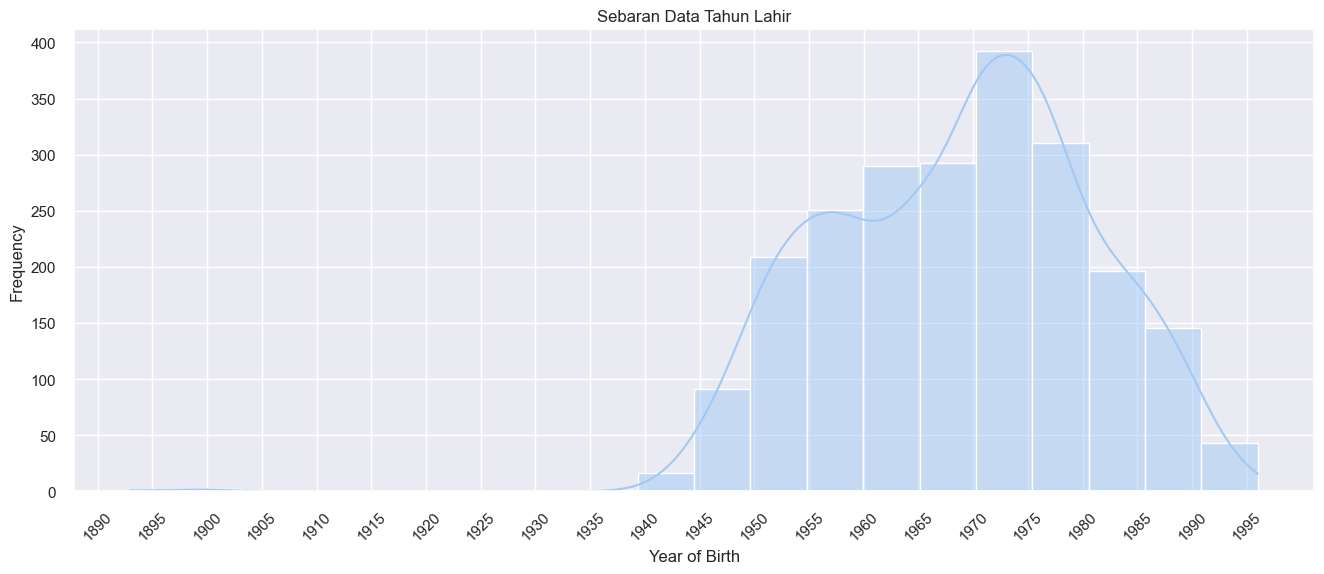

In [7]:
set_labels(x="Year of Birth", y="Frequency", title="Sebaran Data Tahun Lahir")
plt.xticks(list(range(1830,2000,5)), rotation=45)
plt.grid(True)
sns.histplot(df['Year_Birth'], bins=20, kde=True)
plt.show()

Sebagian besar pelanggan antara tahun 1970 hingga 1978,
Orang yang lebih tua tampaknya memiliki frequensi lebih tinggi dibandingkan kelahiran yang lebih muda.
Kemudian Outlier juga ditemukan.

#### 3.1.2 Mayoritas data kategorikal Pendidikan

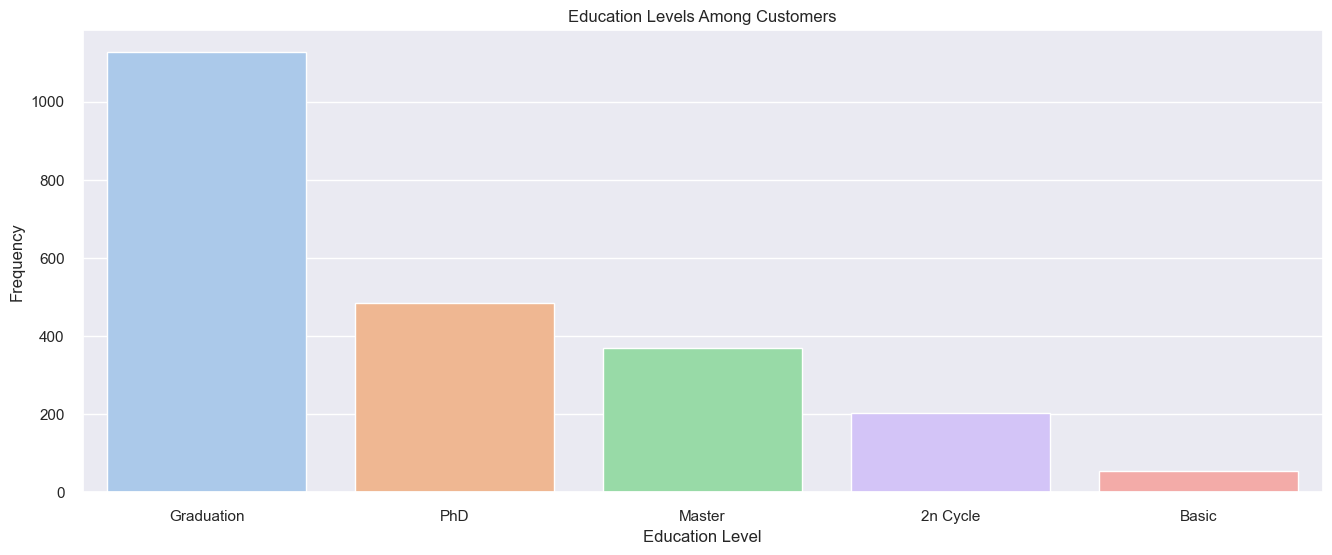

In [8]:
set_labels(x="Education Level", y="Frequency", title="Education Levels Among Customers")
sns.countplot(x=df.Education, order = df.Education.value_counts().index, hue=df.Education, legend=False)
plt.show()

#### 3.1.3 Mayoritas data kategori pernikahan

In [9]:
dfMar = df.Marital_Status.value_counts()
dfMar

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Terlihat beberapa kategori yang tidak masuk akal. `Married` `Together` dapat diartikan berpasangan. `Single` `Divorce` `Widow` `Alone` diasumsikan sebagai lajang, sementara `Absurd` dan `YOLO` dapat diabaikan karena tidak dapat di interpretasi dari kedua kategori sebelumnya.

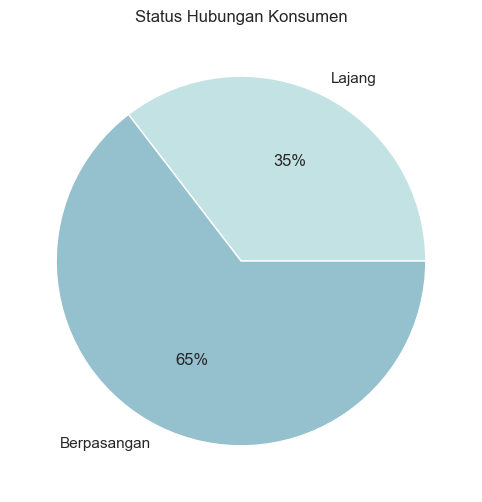

In [10]:
single = dfMar[['Single', 'Divorced', 'Widow', 'Alone']].sum()
relationship =  dfMar[['Married', 'Together']].sum()

set_labels(title="Status Hubungan Konsumen")
color = sns.color_palette('ch:start=.2,rot=-.3')
plt.pie([single, relationship], labels = ['Lajang', 'Berpasangan'], autopct='%.0f%%', colors=color)
plt.show()

Dari pie chart terlihat mayoritas pelanggan berstatus berpasangan 65%

#### 3.1.4 Mayoritas pendapatan pelanggan

Dapat diamati outlier terlihat , ini dapat diabaikan dulu sementara dengan cara menganalisa data lebih dalam


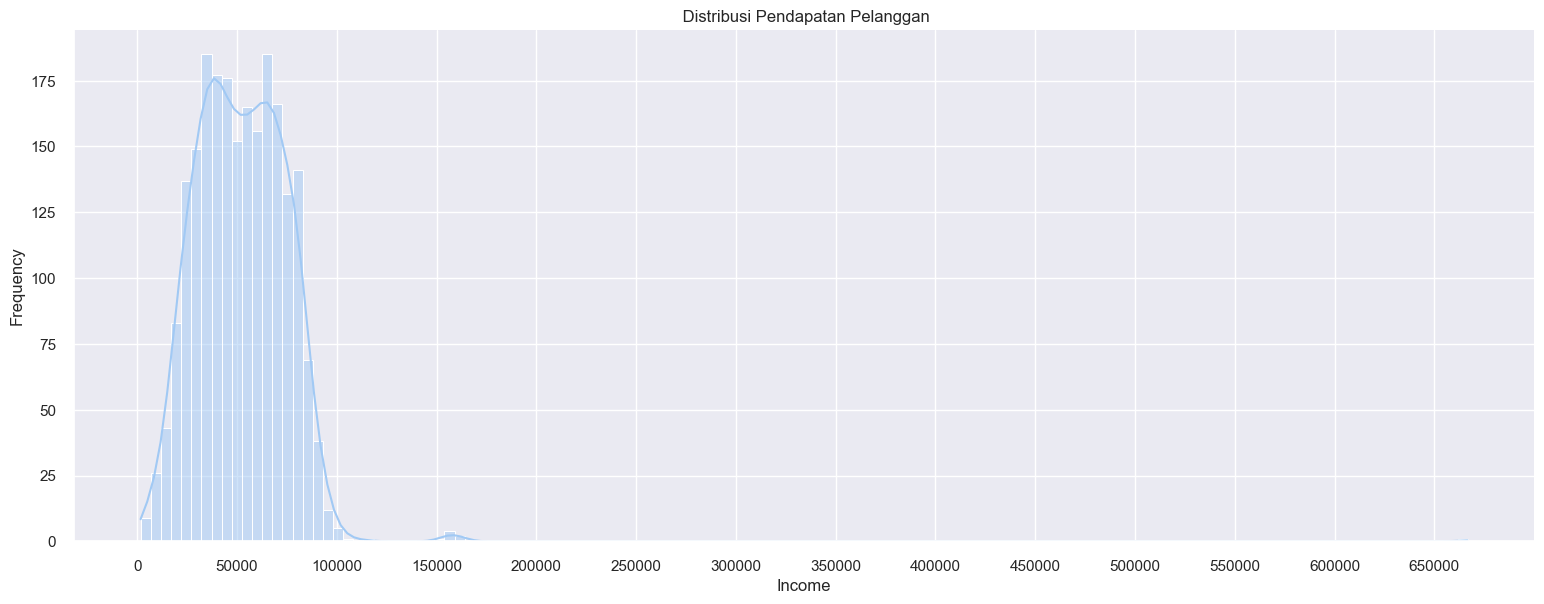

In [11]:
sns.displot(df['Income'], kde=True, height=6, aspect=2.6)
plt.xticks(list(range(0,700000,50000)))
set_labels(x="Income", y="Frequency", title=" Distribusi Pendapatan Pelanggan")
print('Dapat diamati outlier terlihat , ini dapat diabaikan dulu sementara dengan cara menganalisa data lebih dalam')

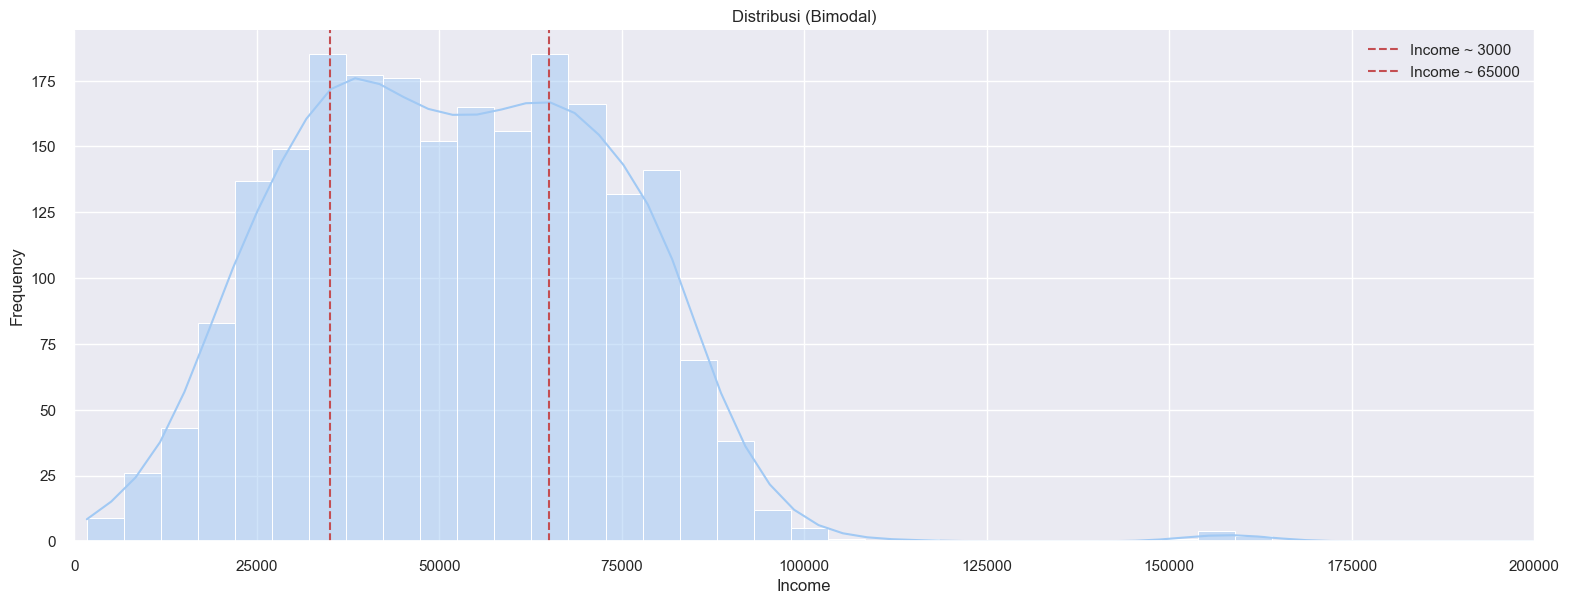

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64
Distribusi pendapatan bersifat bimodal dengan pendapatan tahunan yang paling umum sekitar 35.000 dan 65.000.


In [12]:
sns.displot(df['Income'], kde=True, height=6, aspect=2.6)
plt.xlim([0, 200000])
set_labels(x="Income", y="Frequency", title=" Distribusi Pendapatan Pelanggan")
set_labels(x='Income', y='Frequency', title='Distribusi (Bimodal)')
plt.axvline(x=35000,color='r', linestyle='--', label='Income ~ 3000')
plt.axvline(x=65000,color='r', linestyle='--', label='Income ~ 65000')
plt.legend()
plt.show()
print(df['Income'].describe())
print('Distribusi pendapatan bersifat bimodal dengan pendapatan tahunan yang paling umum sekitar 35.000 dan 65.000.')


#### 3.1.5 Mayoritas Jumlah Anak dan Remaja

Sebagian besar pelanggan tidak memiliki remaja atau anak-anak. Namun, jumlah pelanggan yang memiliki satu remaja lebih banyak daripada pelanggan yang memiliki satu anak.


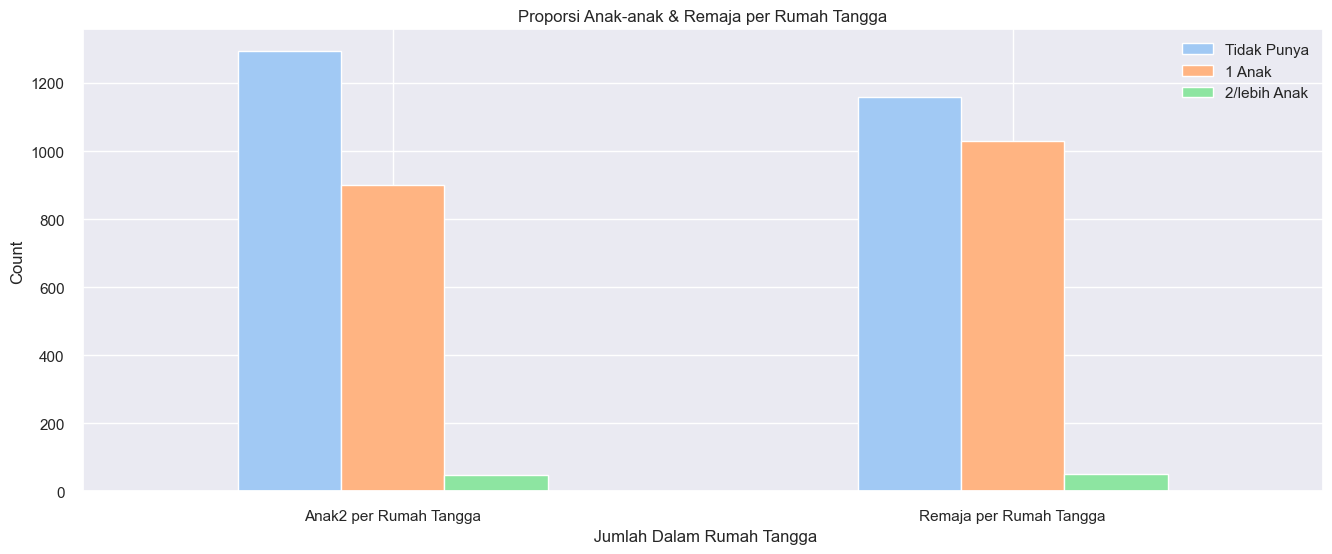

In [13]:
# Menghitung jumlah anak-anak dan remaja di rumah tangga
kid = df.Kidhome.value_counts()
teen = df.Teenhome.value_counts()

# Membuat DataFrame untuk counts
counts = pd.DataFrame({
    'Anak2 per Rumah Tangga': [kid[0], kid[1], kid[2]],  # Jumlah untuk kategori Kids Home
    'Remaja per Rumah Tangga': [teen[0], teen[1], teen[2]]  # Jumlah untuk kategori Teens Home
}, index=['Tidak Punya', '1 Anak', '2/lebih Anak']).T

# Membuat grafik batang
counts.plot(kind="bar", rot=0)
set_labels(x=" Jumlah Dalam Rumah Tangga", y="Count", title="Proporsi Anak-anak & Remaja per Rumah Tangga")
print('Sebagian besar pelanggan tidak memiliki remaja atau anak-anak. Namun, jumlah pelanggan yang memiliki satu remaja lebih banyak daripada pelanggan yang memiliki satu anak.')

#### 3.1.6 Sejak kapan supermarket mulai mendapatkan pelanggannya?

"Tanggal pendaftaran terdistribusi normal, dengan sebagian besar pelanggan terdaftar antara Juli 2012 dan Juli 2014."


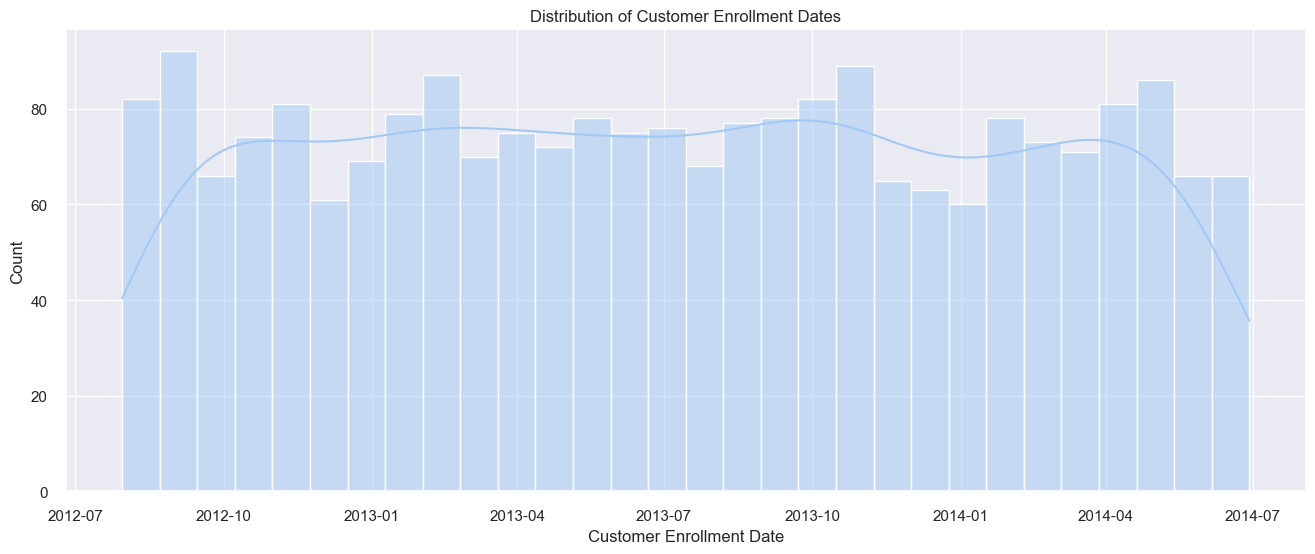

In [14]:

set_labels(x="Customer Enrollment Date", y="Count", title="Distribution of Customer Enrollment Dates")
sns.histplot(pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y'), kde=True, bins= 30)
print('"Tanggal pendaftaran terdistribusi normal, dengan sebagian besar pelanggan terdaftar antara Juli 2012 dan Juli 2014."')

### 3.1.7 Jumlah hari yang paling umum ditemukan pada antara pembelian terakhir pelanggan

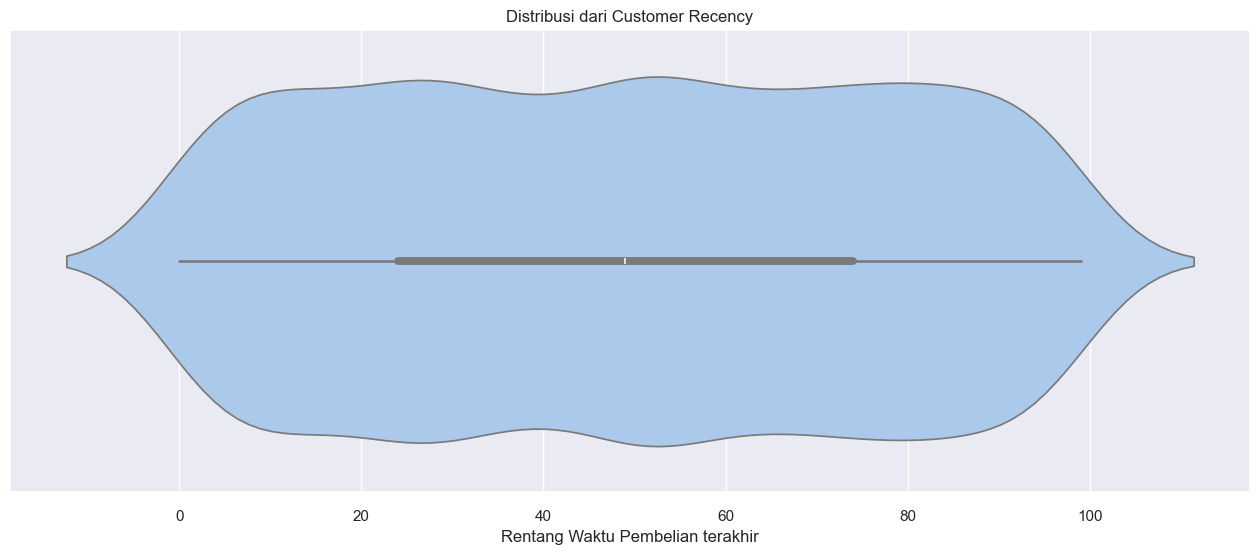

Recency Konsumen terlihat terdistribusi Normal. Interval hari terlihat persis sama.


In [15]:
set_labels(x="Rentang Waktu Pembelian terakhir", title="Distribusi dari Customer Recency")
sns.violinplot(x=df['Recency'])
plt.show()
print('Recency Konsumen terlihat terdistribusi Normal. Interval hari terlihat persis sama.')

### 3.1.8 Persentasi dari Konsumen yang Complain

In [16]:
counts = df.Complain.map({0:"No", 1:"Yes"}).value_counts()

fig = px.pie(values=counts.values, names=counts.index, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Persentasi Komplain Konsumen dalam 2 tahun terakhir', title_x=0.5)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.6,
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['No', 'Yes'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([2219,   21])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'piecolorway': [rgb(102, 197, 204), rgb(246, 207, 113), rgb(248,
                               156, 116), rgb(220, 176, 242), rgb(135, 197, 95),
                               rgb(158, 185, 243), rgb(254, 136, 177), rgb(201,
                               219, 116), rgb(139, 224, 164), rgb(180, 151, 231),
                               rgb(179, 179, 179)],
               'template': '...',
               'title': {'text': 'Persentasi Komplain Konsumen dalam 2 tahun terakhir', 'x': 0.5}}
})

## 3.2 Produk

### 3.2.1 Produk yang paling banyak terjual

In [17]:
avg = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean(axis=0)

fig = px.pie(values=avg.values, names=avg.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Average Amount Spent on Product Categories', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                               'MntSweetProducts', 'MntGoldProds'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([303.93571429,  26.30223214, 166.95      ,  37.52544643,  27.06294643,
                                44.021875  ])}],
    'layout': {'legend': {'tracegroupgap': 0, 'x': 0.99, 'xanchor': 'right', 'y': 0.99, 'yanchor': 'top'},
               'margin': {'t': 60},
               'piecolorway': [rgb(102, 197, 204), rgb(246, 207, 113), rgb(248,
                               156, 116), rgb(220, 176, 242), rgb(135, 197, 95),
                               rgb(158, 185, 243), rgb(254, 136, 177), rgb(201,
                               219, 116), rgb(139, 224, 164), rgb(180, 151, 231),
                               rgb(179, 179, 179)],
               'template': '...',
               'title': {'text': 'Average Amount Spent on Product Categories', 'x': 0.5}}
})

50% dari rata-rata konsumen membeli wines, kemudian product Meat 27%.

### 3.2.2 Hubungan Pendidikan dan Pola Konsumtif Konsumen

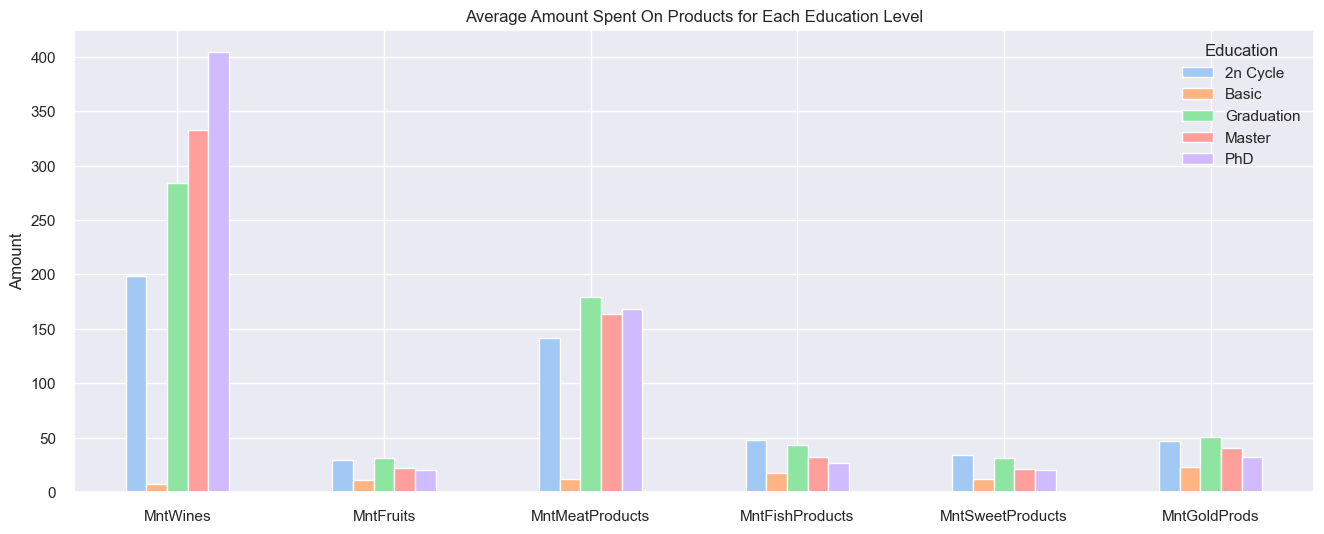

In [18]:
cat = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean().T

cat.plot(kind='bar', rot=0)
set_labels(y="Amount", title="Average Amount Spent On Products for Each Education Level")

Dari Visualisasi menunjukkan bahwa pemegang gelar PhD menghabiskan paling banyak untuk anggur. Untuk buah-buahan, emas, dan produk daging, individu yang berpendidikan "sarjana" menghabiskan paling banyak. Sedangkan individu dengan pendidikan "2n cycle" menghabiskan paling banyak untuk ikan dan permen

### 3.2.3 Pengaruh Complain dan pola belanja

In [19]:
cat = df.copy()
cat.Complain = cat.Complain.map({0:"No", 1:"Yes"})
cat = round(cat.groupby('Complain')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean().T.unstack().reset_index(level=1, name='mean') \
          .rename(columns={'level_1':'category'}).reset_index(), 2)

fig = px.bar(data_frame=cat, y='mean', x='Complain',
             text=cat['mean'].map(lambda x: str(x)),
             color_discrete_sequence=px.colors.qualitative.Pastel,
             color='category')

fig.update_layout(title="Complaining Vs Non-complaining Individu", title_x=0.5)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'category=MntWines<br>Complain=%{x}<br>mean=%{y}<br>text=%{text}<extra></extra>',
              'legendgroup': 'MntWines',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'MntWines',
              'offsetgroup': 'MntWines',
              'orientation': 'v',
              'showlegend': True,
              'text': array(['305.21', '169.0'], dtype=object),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['No', 'Yes'], dtype=object),
              'xaxis': 'x',
              'y': array([305.21, 169.  ]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'category=MntFruits<br>Complain=%{x}<br>mean=%{y}<br>text=%{text}<extra></extra>',
              'legendgroup': 'MntFruits',
              'marker': {'color': 'rgb(246, 207, 113)', 'pattern': {'shape': ''}},
              'name': 'MntFruits',
              'offsetgroup': 'MntFruits',
              'orientation': 'v',
              'showlegend': True,
              'text': array(['26.32', '24.19'], dtype=object),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['No', 'Yes'], dtype=object),
              'xaxis': 'x',
              'y': array([26.32, 24.19]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('category=MntMeatProducts<br>Co' ... 'br>text=%{text}<extra></extra>'),
              'legendgroup': 'MntMeatProducts',
              'marker': {'color': 'rgb(248, 156, 116)', 'pattern': {'shape': ''}},
              'name': 'MntMeatProducts',
              'offsetgroup': 'MntMeatProducts',
              'orientation': 'v',
              'showlegend': True,
              'text': array(['167.47', '112.48'], dtype=object),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['No', 'Yes'], dtype=object),
              'xaxis': 'x',
              'y': array([167.47, 112.48]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('category=MntFishProducts<br>Co' ... 'br>text=%{text}<extra></extra>'),
              'legendgroup': 'MntFishProducts',
              'marker': {'color': 'rgb(220, 176, 242)', 'pattern': {'shape': ''}},
              'name': 'MntFishProducts',
              'offsetgroup': 'MntFishProducts',
              'orientation': 'v',
              'showlegend': True,
              'text': array(['37.64', '25.76'], dtype=object),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['No', 'Yes'], dtype=object),
              'xaxis': 'x',
              'y': array([37.64, 25.76]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('category=MntSweetProducts<br>C' ... 'br>text=%{text}<extra></extra>'),
              'legendgroup': 'MntSweetProducts',
              'marker': {'color': 'rgb(135, 197, 95)', 'pattern': {'shape': ''}},
              'name': 'MntSweetProducts',
              'offsetgroup': 'MntSweetProducts',
              'orientation': 'v',
              'showlegend': True,
              'text': array(['27.15', '17.52'], dtype=object),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['No', 'Yes'], dtype=object),
              'xaxis': 'x',
              'y': array([27.15, 17.52]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('category=MntGoldProds<br>Compl' ... 'br>text=%{text}<extra></extra>'),
              'legendgroup': 'MntGoldProds',
              'marker': {'color': 'rgb(158, 185, 243)', 'pattern': {'shape': ''}},
              'name': 'MntGoldProds',
              'offsetgroup': 'MntGoldProds',
              'orientation': 'v',
              'showlegend': True,

Seperti yang diharapkan, orang-orang yang mengeluh tentang layanan tingkat pembeliannya lebih sedikit.
Rata-rata pengeluaran untuk pelanggan yang mengeluh jauh lebih rendah di semua kategori produk.

## 3.3 Promosi

### 3.3.1 Distribusi pembelian dengan diskon di antara berbagai tingkat pendidikan

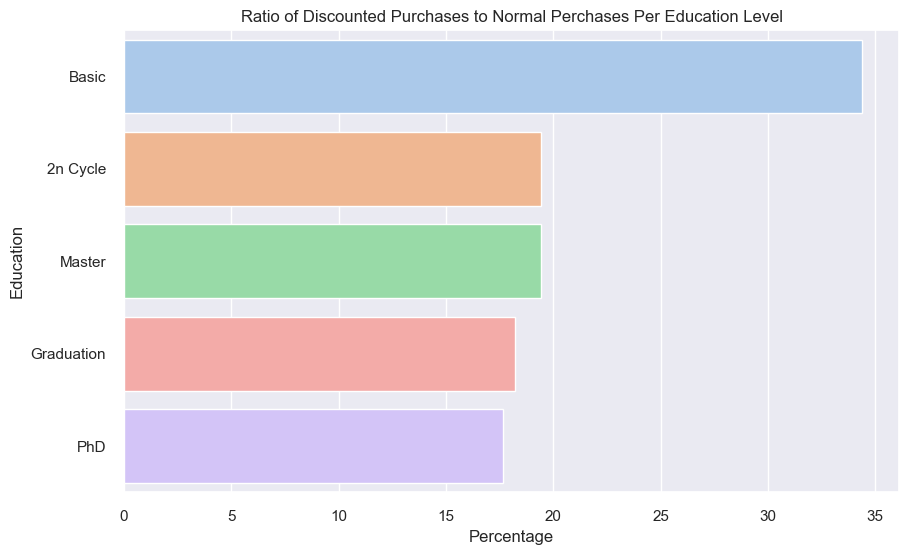

In [20]:
discounted_purchases = df.groupby('Education').NumDealsPurchases.sum()
total_purchases = df.groupby('Education')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum(axis=1)

percentage = round(discounted_purchases * 100 / total_purchases, 2).sort_values(ascending=False)
percentage_df = percentage.reset_index()
percentage_df.columns = ['Education', 'Percentage']
# Visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, y='Education', x='Percentage', hue='Education')

set_labels(x="Percentage", y="Education", title="Ratio of Discounted Purchases to Normal Perchases Per Education Level")

Terlihat bahwa individu dengan tingkat pendidikan terendah memiliki persentase pembelian dengan diskon yang jauh lebih tinggi.
Persentase pembelian dengan diskon terendah dilakukan oleh pemegang gelar PhD.

### 3.3.2 Kampanye yang paling sukses di antara pelanggan

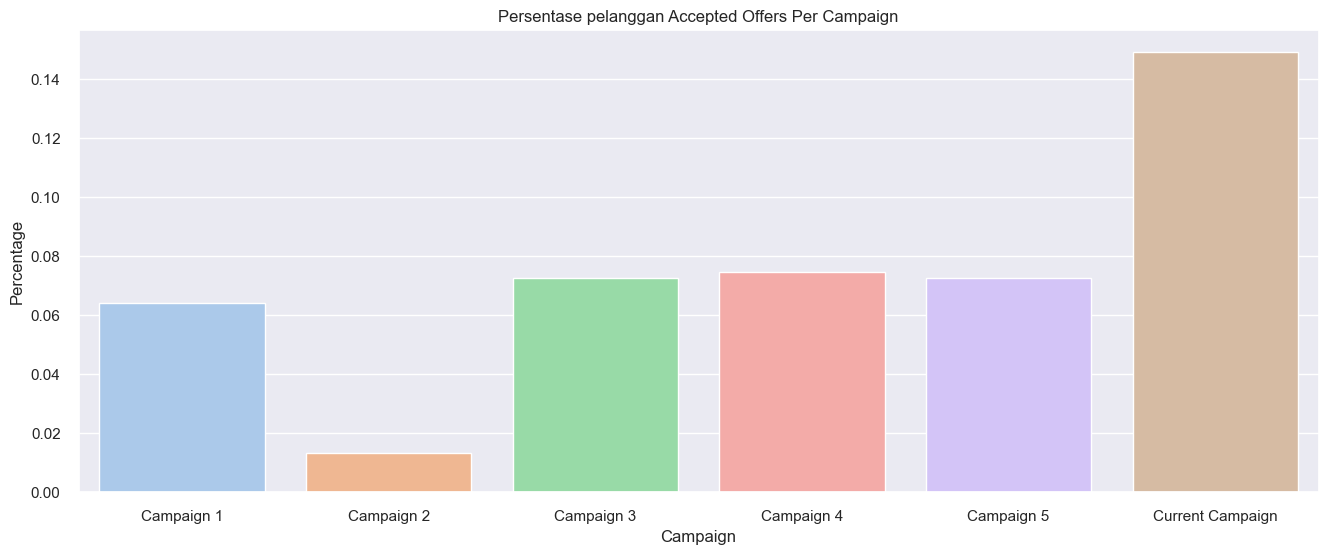

In [21]:
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0) / len(df)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Current Campaign']

set_labels(y="Percentage", x="Campaign", title="Persentase pelanggan Accepted Offers Per Campaign")
sns.barplot(y=aCmp.values, x=names, hue = names)
plt.show()


Dapat kita amati bahwa permintaan terhadap penawaran kampanye sangat rendah di kalangan pelanggan, karena kampanye yang paling sukses hanya menarik sekitar 15% dari pelanggan.

### 3.3.3 Persentase penawaran yang diterima per kampanye dari semua penawaran yang diterima

In [22]:
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Current Campaign']

fig = px.pie(values=aCmp.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.6,
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5',
                               'Current Campaign'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([144,  30, 163, 167, 163, 334])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'piecolorway': [rgb(102, 197, 204), rgb(246, 207, 113), rgb(248,
                               156, 116), rgb(220, 176, 242), rgb(135, 197, 95),
                               rgb(158, 185, 243), rgb(254, 136, 177), rgb(201,
                               219, 116), rgb(139, 224, 164), rgb(180, 151, 231),
                               rgb(179, 179, 179)],
               'template': '...',
               'title': {'text': 'Percentage of Accepted Offers Per Campaign', 'x': 0.5}}
})

Kampanye berjalaan saat ini memiliki jauh lebih banyak penawaran yang diterima, dengan sekitar 33,4% dari semua penawaran yang diterima. Ini menjadikannya kampanye yang paling sukses sejauh ini.

### 3.3.4 Outlet yang memiliki jumlah pembelian paling banyak

In [23]:

# Menghitung total pembelian berdasarkan metode
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
columns_new = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

total = pd.DataFrame({
    'Method': columns_new,
    'Total': df[columns].sum().values
})

# Membuat treemap
fig = px.treemap(total, path=['Method'], values='Total',
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                )

# Mengatur layout
fig.update_layout(margin=dict(t=25, l=25, r=25, b=25),
                  title_text='Transaksi yang dilakukan berdasarkan Metode',
                  title_x=0.5,
                  title_y=0.96)

# Menampilkan plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Dapat kita lihat bahwa sebagian besar pembelian dilakukan di toko, diikuti oleh pembelian melalui web dengan 9150 transaksi. Pembelian melalui katalog merupakan yang paling sedikit.

# 4 Data Cleaning <a class="anchor" id="cleaning"></a>
Data cleaning adalah langkah penting dalam proses analisis data, karena memastikan kualitas dan keandalan data yang digunakan untuk analisis. Dalam bagian ini, kami akan menjelaskan langkah-langkah yang diambil untuk membersihkan dataset, mengatasi masalah seperti nilai yang hilang, duplikat, dan inkonsistensi

## 4.1 Missing Values <a class="anchor" id="cleaning_missing"></a>

In [23]:
missing = (df.isna().sum() / len(df) * 100).round(2)
print(missing)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64


Karena jumlah data hilang sangat sedikit hanya sekitar 1 %, diputuskan untuk menghapus row data yang missing.

In [24]:
df = df.dropna()
df.shape
print(f"Data yang tersisa setelah row missing dihapus adalah :{df.shape}")

Data yang tersisa setelah row missing dihapus adalah :(2216, 29)


## 4.2 Inkonsistensi Tipe Data <a class="anchor" id="cleaning_incorrect"></a>

In [25]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Kolom `Dt_Customer` bertipe data Object, Kolom ini mengandung format waktu. Agar lebih sederhana kolom ini akan di casting ke tipe data integer

In [26]:
df.loc[:, 'Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce').dt.year

df['Dt_Customer']

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2216, dtype: object

## 4.3 Inkonsistensi Nilai <a class="anchor" id="cleaning_inconsistent"></a>

In [27]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Pada kolom pendidikan, kita memiliki banyak nilai untuk pendidikan, dan kita dapat mengonversinya menjadi sesuatu yang dapat dipahami. Dari beberapa penelitian, ditemukan bahwa `2n cycle` adalah gelar magister, `Basic` adalah hingga sekolah menengah, dan `Graduation` adalah gelar sarjana.

In [28]:

df['Education'] = df['Education'].replace({
    "Graduation": "Bachelor",
    "Basic": "High School",
    "2n Cycle": "Master"
})
df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'High School'], dtype=object)

In [29]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Bisa kita lihat nilai dalam `Marital_Status` juga tidak konsisten. Kita dapat membagi menjadi 2 , Single & Couple


In [30]:
df['Marital_Status'] = df['Marital_Status'].replace({"Together": "Couple",
                           "Married": "Couple",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},)

df.Marital_Status.unique()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Couple,71613.0,0,0,2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Couple,26646.0,1,0,2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Couple,58293.0,1,0,2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Couple,61223.0,0,1,2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Couple,64014.0,2,1,2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Bachelor,Single,56981.0,0,0,2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Couple,69245.0,0,1,2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 4.4 Menghapus Outlier  <a class="anchor" id="cleaning_outliers"></a>

Pada tahap awal(EDA), dapat diamati beberapa outlier. outlier tersebut terutama merupakan nilai ekstrem dalam kolom tahun kelahiran dan pendapatan. Karena jumlahnya sedikit, aman untuk menghapus nilai-nilai tersebut.

In [31]:
df = df.loc[df.Year_Birth  >= 1935]
df = df.loc[df.Income  <= 200000]

df.shape

(2212, 29)

## 4.5 Menghapus Kolom yang Tidak diperlukan <a class="anchor" id="cleaning_unneeded"></a>

Saat penilaian awal, kami mengamati bahwa kolom ID, Z_Revenue, dan Z_CostContact tidak memiliki tujuan yang jelas. Oleh karena itu, lebih baik jika kolom-kolom tersebut dihapus.

In [32]:
df.Z_Revenue.value_counts()

Z_Revenue
11    2212
Name: count, dtype: int64

In [33]:
df.Z_CostContact.value_counts()

Z_CostContact
3    2212
Name: count, dtype: int64

Kolom Z mengandung satu nilai untuk seluruh data, sehingga sebaiknya dihapus.

In [34]:
df.drop(columns=['ID', 'Z_Revenue', 'Z_CostContact'], inplace=True)

## 4.6 Penamaan Ulang Kolom <a class="anchor" id="cleaning_rename"></a>
Kolom `Response` mungkin dinamai demikian untuk menunjukkan target dari kolom target model ML.<br>Namun, penamaan ini tidak membantu untuk analisis. Karena kita sudah mengetahui arti dari kolom ini, kita dapat menggantinya dengan nama yang lebih sesuai.<br>Selain itu, nama kolom `Dt_Customer` juga ambigu

In [35]:
df.rename(columns={'Response': 'AcceptedCmpCurrent', 'Dt_Customer':'CustomerSince'}, inplace=True)

# 5 Feature Engineering <a class="anchor" id="eng"></a>
Proses menciptakan fitur baru dari data yang ada untuk meningkatkan kinerja model analisis. Dalam bagian ini, kami akan menjelaskan beberapa teknik feature engineering yang diterapkan pada dataset.

## 5.1 Total Jumlah Pembelian <a class="anchor" id="eng_tot_pur"></a>
Kita memiliki jumlah pembelian yang dilakukan oleh seorang pelanggan di setiap outlet. Kita dapat menjumlahkan semua itu untuk mendapatkan total jumlah pembelian yang dilakukan oleh pelanggan tersebut.

In [36]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['NumPurchases'] = df[cols].sum(axis=1)

df['NumPurchases']

0       22
1        4
2       20
3        6
4       14
        ..
2235    16
2236    15
2237    18
2238    21
2239     8
Name: NumPurchases, Length: 2212, dtype: int64

## 5.2 Jumlah Uang yang Dibelanjakan <a class="anchor" id="eng_amt_spnt"></a>
Kita dapat menjumlahkan jumlah uang yang dibelanjakan di setiap kategori untuk mendapatkan total jumlah uang yang dibelanjakan oleh pelanggan.

In [37]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['AmountSpent'] = df[cols].sum(axis=1)

df['AmountSpent']



0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: AmountSpent, Length: 2212, dtype: int64

## 5.3 Jumlah Uang per Pembelian <a class="anchor" id="eng_amt_pur"></a>
Kita kemudian dapat menggunakan fitur baru yang telah dibuat, yaitu NumPurchases dan AmountSpent, untuk mendapatkan rata-rata jumlah uang yang dibelanjakan oleh pelanggan dalam satu pembelian. Kita dapat melakukannya dengan membagi keduanya.

In [38]:
df['AmountPerPurchase'] = df['AmountSpent'] / (df['NumPurchases'] + 1e-1)

df['AmountPerPurchase']

0       73.167421
1        6.585366
2       38.606965
3        8.688525
4       29.929078
          ...    
2235    83.291925
2236    29.403974
2237    68.563536
2238    39.952607
2239    21.234568
Name: AmountPerPurchase, Length: 2212, dtype: float64

## 5.4 Jumlah Populasi di Rumah <a class="anchor" id="eng_person"></a>
Kita memiliki kolom untuk jumlah anak dan jumlah remaja. <br>Dengan menjumlahkan ini dengan 1 atau 2 tergantung pada status pernikahan, kita dapat menyimpulkan jumlah individu dalam rumah tangga.

In [ ]:
# Menghitung jumlah orang di rumah
cols = ['Kidhome', 'Teenhome']
df['PersonsInHome'] = df[cols].sum(axis=1) + 2

# Mengurangi 1 untuk status pernikahan 'Single'
df.loc[df['Marital_Status'] == 'Single', 'PersonsInHome'] -= 1

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerSince,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpCurrent,NumPurchases,AmountSpent,AmountPerPurchase,PersonsInHome
0,1957,Bachelor,Single,58138.0,0,0,2012,58,635,88,...,0,0,0,0,0,1,22,1617,73.167421,1
1,1954,Bachelor,Single,46344.0,1,1,2014,38,11,1,...,0,0,0,0,0,0,4,27,6.585366,3
2,1965,Bachelor,Couple,71613.0,0,0,2013,26,426,49,...,0,0,0,0,0,0,20,776,38.606965,2
3,1984,Bachelor,Couple,26646.0,1,0,2014,26,11,4,...,0,0,0,0,0,0,6,53,8.688525,3
4,1981,PhD,Couple,58293.0,1,0,2014,94,173,43,...,0,0,0,0,0,0,14,422,29.929078,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Bachelor,Couple,61223.0,0,1,2013,46,709,43,...,0,0,0,0,0,0,16,1341,83.291925,3
2236,1946,PhD,Couple,64014.0,2,1,2014,56,406,0,...,0,0,1,0,0,0,15,444,29.403974,5
2237,1981,Bachelor,Single,56981.0,0,0,2014,91,908,48,...,1,0,0,0,0,0,18,1241,68.563536,1
2238,1956,Master,Couple,69245.0,0,1,2014,8,428,30,...,0,0,0,0,0,0,21,843,39.952607,3


# 6 Pra-pemrosesan <a class="anchor" id="pre"></a>
Untuk menganalisis output pengelompokan di kemudian hari, kita akan menjaga data asli tetap tidak terubah.